# Import Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the Dataset

In [36]:
file_path = 'HeartDiseaseTrain-Test.csv'
df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)

Dataset shape: (1025, 14)


In [38]:
print("First few rows:")
print(df.head())

First few rows:
   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                    

# Clean the Data

In [41]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


In [43]:
# Drop rows with missing values (or you can fill them)
df = df.dropna()

# Exploratory Data Analysis

### Correlation heatmap

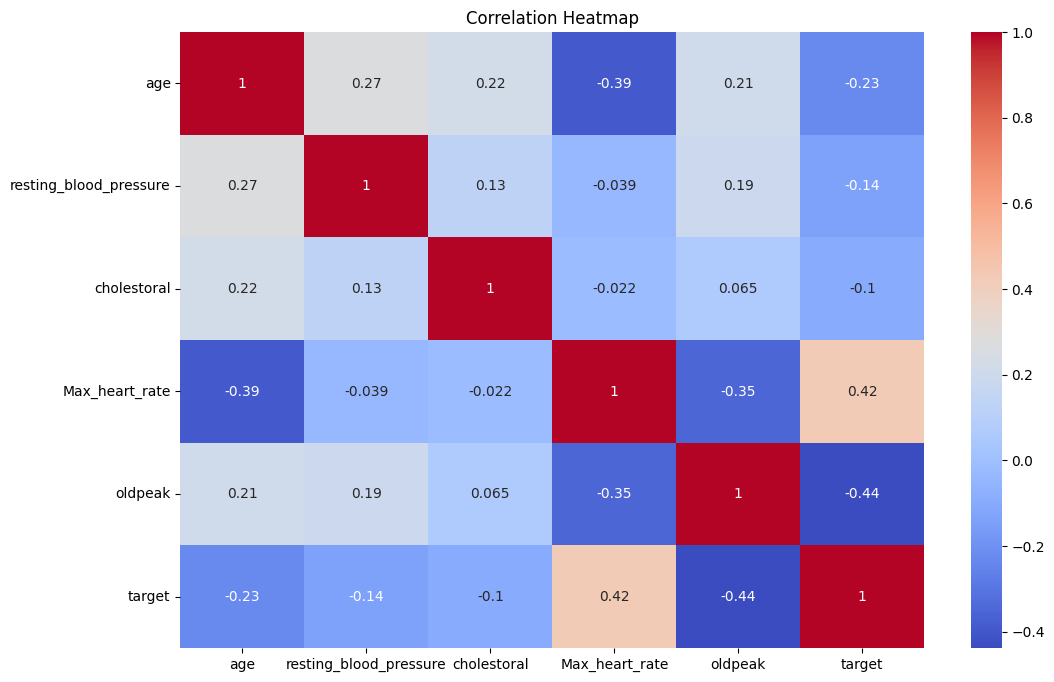

In [47]:
# Correlation heatmap (only numeric features)
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Class distribution

In [ ]:
# Class distribution
sns.countplot(data=df, x='target')
plt.title("Heart Disease Presence (0 = No, 1 = Yes)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Model Training

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

# Evaluation

### Accuracy

In [59]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.81


### Confusion Matrix

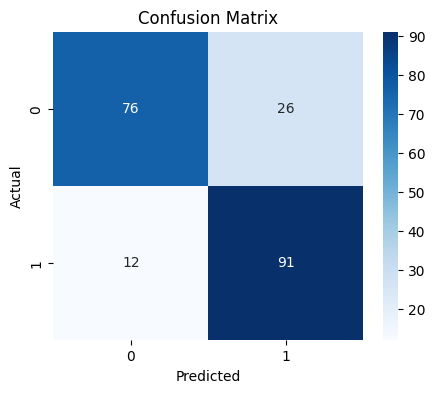

In [64]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve

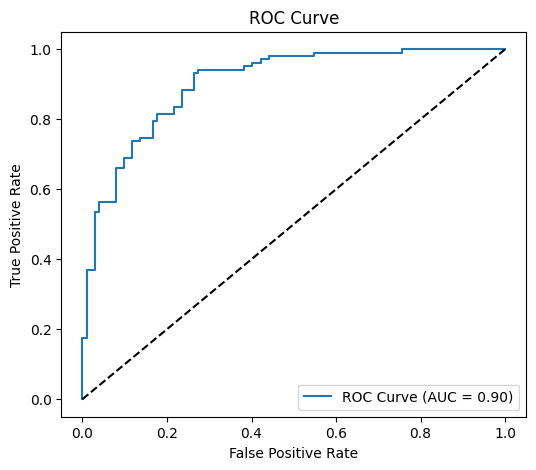

In [62]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature Importance

In [68]:
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

print("\nTop 10 Most Influential Features:")
print(feature_importance.head(10))


Top 10 Most Influential Features:
vessels_colored_by_flourosopy_Two     -1.245722
chest_pain_type_Typical angina        -1.203841
vessels_colored_by_flourosopy_One     -1.033664
sex_Male                              -0.849210
vessels_colored_by_flourosopy_Three   -0.715203
thalassemia_Reversable Defect         -0.679234
slope_Flat                            -0.659001
oldpeak                               -0.604212
Max_heart_rate                         0.554374
chest_pain_type_Atypical angina       -0.456233
dtype: float64


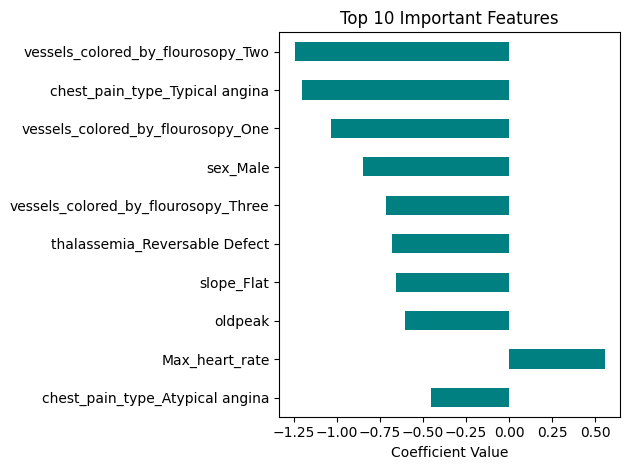

In [70]:
# Plot top 10 important features
feature_importance.head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()